# Achievement 4 Final Project

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#Importing Data
path = r'C:\Users\dylan\Documents\Instacart Basket Analysis'


customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_merged.pkl'))
customers_merged.head()

(30964564, 36)

## First name and surname could all be personal data that could be removed.

In [16]:
#Dropping private columns
customers_new = customers_merged.drop(columns = ['First Name', 'Surnam'])
customers_new.head()

,order_id,user_id,eval_set,order_number,order_dow,hour_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_days,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,exist
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,NaN,nan,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,13.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,10.0,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [20]:
customers_new['STATE'].value_counts(dropna=False)

STATE
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [17]:
#Creating region column
region1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

customers_new.loc[customers_new['STATE'].isin(region1), 'region'] = 'Northeast'
customers_new.loc[customers_new['STATE'].isin(region2), 'region'] = 'Midwest'
customers_new.loc[customers_new['STATE'].isin(region3), 'region'] = 'South'
customers_new.loc[customers_new['STATE'].isin(region4), 'region'] = 'West'

customers_new['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [21]:
#Creating crosstab for spending habits
spending_habits = pd.crosstab(customers_new['spending_flag'], customers_new['region'], dropna=False)
spending_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,1269,915,1787,1386
Low spender,47412,35138,66232,52070
nan,7548644,5686683,10723866,8239457


## The south has the highest number of high spenders, but it also has the most low spenders which would imply that it is due to general population. 

In [22]:
#Creating exclusion flag
customers_new.loc[customers_new['max_order'] >= 5, 'exclusion_flag'] = 'Normal-activity'
customers_new.loc[customers_new['max_order'] < 5, 'exclusion_flag'] = 'Low-activity'

In [23]:
customers_new['exclusion_flag'].value_counts(dropna=False)

exclusion_flag
Normal-activity    30964564
Low-activity        1440295
Name: count, dtype: int64

In [24]:
#Excluding low-activity customers and exporting
customers_normal = customers_new[customers_new['exclusion_flag'] == 'Normal-activity']

customers_normal.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'normal_activity_customers.pkl'))

In [27]:
customers_normal.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'hour_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'exists', 'max_order', 'loyalty_flag',
       'avg_prod_price', 'spending_flag', 'median_days', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'exist', 'region', 'exclusion_flag'],
      dtype='object')

In [29]:
#Profiling for age
customers_normal['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [36]:
customers_normal.loc[(customers_normal['Age'] >= 18) & (customers_normal['Age'] < 30), 'age_group'] = 'Young adult'
customers_normal.loc[(customers_normal['Age'] >= 30) & (customers_normal['Age'] < 61), 'age_group'] = 'Middle-aged'
customers_normal.loc[customers_normal['Age'] >= 61, 'age_group'] = 'Elderly'

customers_normal['age_group'].value_counts(dropna=False)

C:\Users\dylan\AppData\Local\Temp\ipykernel_3496\2482992440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_normal.loc[(customers_normal['Age'] >= 18) & (customers_normal['Age'] < 30), 'age_group'] = 'Young adult'


age_group
Middle-aged    15034354
Elderly        10112607
Young adult     5817603
Name: count, dtype: int64

In [34]:
#Profiling for income
customers_normal['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [37]:
customers_normal.loc[customers_normal['income'] <= 67292, 'income_group'] = 'Low income'
customers_normal.loc[(customers_normal['income'] > 67292) & (customers_normal['income'] <= 128102), 'income_group'] = 'Middle income'
customers_normal.loc[customers_normal['income'] > 128102, 'income_group'] = 'High income'

customers_normal['income_group'].value_counts(dropna=False)

C:\Users\dylan\AppData\Local\Temp\ipykernel_3496\3364110048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_normal.loc[customers_normal['income'] <= 67292, 'income_group'] = 'Low income'


income_group
Middle income    15482125
Low income        7741348
High income       7741091
Name: count, dtype: int64

In [38]:
customers_normal.fam_status.value_counts()

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [41]:
#creating profile based on age and family
single_group = ['single', 'divorced/widowed', 'living with parents and siblings']

customers_normal.loc[(customers_normal['age_group'] == 'Young adult') & (customers_normal['n_dependants'] == 0) & (customers_normal['fam_status'].isin(single_group)), 'customer_profile'] = 'Single young adult no children'
customers_normal.loc[(customers_normal['age_group'] == 'Young adult') & (customers_normal['n_dependants'] >= 1) & (customers_normal['fam_status'].isin(single_group)), 'customer_profile'] = 'Single young adult with children'
customers_normal.loc[(customers_normal['age_group'] == 'Young adult') & (customers_normal['n_dependants'] == 0) & (customers_normal['fam_status'] == 'married'), 'customer_profile'] = 'Married young adult no children'
customers_normal.loc[(customers_normal['age_group'] == 'Young adult') & (customers_normal['n_dependants'] >= 1) & (customers_normal['fam_status'] == 'married'), 'customer_profile'] = 'Single young adult no children'

customers_normal.loc[(customers_normal['age_group'] == 'Middle-aged') & (customers_normal['n_dependants'] == 0) & (customers_normal['fam_status'].isin(single_group)), 'customer_profile'] = 'Single middle-aged adult no children'
customers_normal.loc[(customers_normal['age_group'] == 'Middle-aged') & (customers_normal['n_dependants'] >= 1) & (customers_normal['fam_status'].isin(single_group)), 'customer_profile'] = 'Single middle-aged adult with children'
customers_normal.loc[(customers_normal['age_group'] == 'Middle-aged') & (customers_normal['n_dependants'] == 0) & (customers_normal['fam_status'] == 'married'), 'customer_profile'] = 'Married middle-aged adult no children'
customers_normal.loc[(customers_normal['age_group'] == 'Middle-aged') & (customers_normal['n_dependants'] >= 1) & (customers_normal['fam_status'] == 'married'), 'customer_profile'] = 'Single middle-aged adult no children'

customers_normal.loc[(customers_normal['age_group'] == 'Elderly') & (customers_normal['n_dependants'] == 0) & (customers_normal['fam_status'].isin(single_group)), 'customer_profile'] = 'Single elderly adult no children'
customers_normal.loc[(customers_normal['age_group'] == 'Elderly') & (customers_normal['n_dependants'] >= 1) & (customers_normal['fam_status'].isin(single_group)), 'customer_profile'] = 'Single elderly adult with children'
customers_normal.loc[(customers_normal['age_group'] == 'Elderly') & (customers_normal['n_dependants'] == 0) & (customers_normal['fam_status'] == 'married'), 'customer_profile'] = 'Married elderly adult no children'
customers_normal.loc[(customers_normal['age_group'] == 'Elderly') & (customers_normal['n_dependants'] >= 1) & (customers_normal['fam_status'] == 'married'), 'customer_profile'] = 'Single elderly adult no children'

customers_normal['customer_profile'].value_counts(dropna=False)

customer_profile
Single middle-aged adult no children    15034354
Single elderly adult no children        10112607
Single young adult no children           4336431
Single young adult with children         1481172
Name: count, dtype: int64

In [48]:
#Expanding profile with income
customers_normal.loc[(customers_normal['customer_profile'] == 'Single young adult no children') & (customers_normal['income_group'] == 'Low income'), 'income_profile'] = 'Young adult low income'
customers_normal.loc[(customers_normal['customer_profile'] == 'Single young adult no children') & (customers_normal['income_group'] == 'Middle income'), 'income_profile'] = 'Young adult middle class'
customers_normal.loc[(customers_normal['customer_profile'] == 'Single young adult no children') & (customers_normal['income_group'] == 'High income'), 'income_profile'] = 'Young adult high income'

customers_normal.loc[(customers_normal['customer_profile'] == 'Single young adult with children') & (customers_normal['income_group'] == 'Low income'), 'income_profile'] = 'Young single parent low income'
customers_normal.loc[(customers_normal['customer_profile'] == 'Single young adult with children') & (customers_normal['income_group'] == 'Middle income'), 'income_profile'] = 'Young single parent middle class'
customers_normal.loc[(customers_normal['customer_profile'] == 'Single young adult with children') & (customers_normal['income_group'] == 'High income'), 'income_profile'] = 'Young single parent high income'

customers_normal.loc[(customers_normal['customer_profile'] == 'Single middle-aged adult no children') & (customers_normal['income_group'] == 'Low income'), 'income_profile'] = 'Middle-aged adult low income'
customers_normal.loc[(customers_normal['customer_profile'] == 'Single middle-aged adult no children') & (customers_normal['income_group'] == 'Middle income'), 'income_profile'] = 'Middle-aged adult middle class'
customers_normal.loc[(customers_normal['customer_profile'] == 'Single middle-aged adult no children') & (customers_normal['income_group'] == 'High income'), 'income_profile'] = 'Middle-aged high income'

customers_normal.loc[(customers_normal['customer_profile'] == 'Single elderly adult no children') & (customers_normal['income_group'] == 'Low income'), 'income_profile'] = 'Elderly adult low income'
customers_normal.loc[(customers_normal['customer_profile'] == 'Single elderly adult no children') & (customers_normal['income_group'] == 'Middle income'), 'income_profile'] = 'Elderly adult middle class'
customers_normal.loc[(customers_normal['customer_profile'] == 'Single elderly adult no children') & (customers_normal['income_group'] == 'High income'), 'income_profile'] = 'Elderly adult high income'

customers_normal['income_profile'].value_counts(dropna=False)

income_profile
Middle-aged adult middle class      7481588
Elderly adult middle class          4934612
Elderly adult high income           3882214
Middle-aged high income             3790895
Middle-aged adult low income        3761871
Young adult middle class            2266572
Young adult low income              2019659
Elderly adult low income            1295781
Young single parent middle class     799353
Young single parent low income       664037
Young adult high income               50200
Young single parent high income       17782
Name: count, dtype: int64

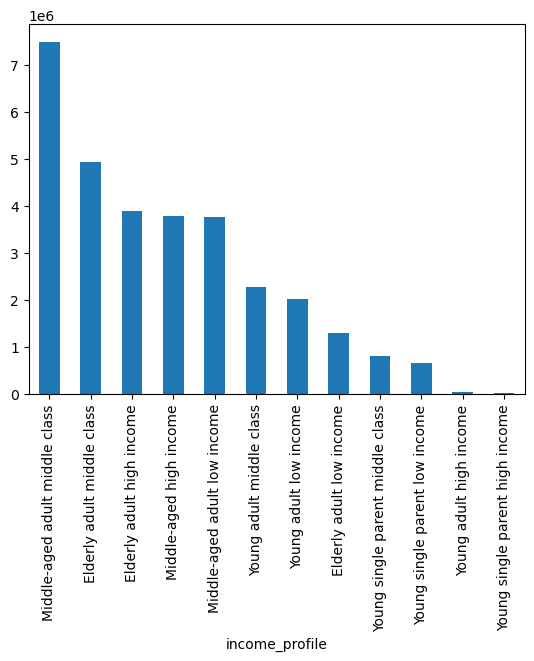

In [49]:
#Creating a bar chart for customer profile
customer_bar = customers_normal['income_profile'].value_counts().plot.bar()

## As we can see from the chart, our primary users are middle-aged and older adults that are single.

In [50]:
#Aggregating max, mean, and min
customers_agg = customers_normal.groupby('income_profile')[['days_since_prior_order', 'prices']].agg(['max', 'mean', 'min'])
customers_agg.head(15)

days_since_prior_order                  \
                                                    max       mean  min   
income_profile                                                            
Elderly adult high income                          30.0  10.695695  0.0   
Elderly adult low income                           30.0  11.184257  0.0   
Elderly adult middle class                         30.0  10.765040  0.0   
Middle-aged adult low income                       30.0  10.909726  0.0   
Middle-aged adult middle class                     30.0  10.770507  0.0   
Middle-aged high income                            30.0  10.831837  0.0   
Young adult high income                            30.0  10.297352  0.0   
Young adult low income                             30.0  10.927653  0.0   
Young adult middle class                           30.0  10.768927  0.0   
Young single parent high income                    30.0   9.178224  0.0   
Young single parent low income                     30.0  10.930993  0.0   
Young single parent middle class                   30.0  10.637390  0.0   

                                   prices                   
                                      max        mean  min  
income_profile                                              
Elderly adult high income         99999.0   17.358909  1.0  
Elderly adult low income             25.0    6.715031  1.0  
Elderly adult middle class        99999.0    8.774497  1.0  
Middle-aged adult low income      14900.0    7.309493  1.0  
Middle-aged adult middle class    99999.0    9.232977  1.0  
Middle-aged high income           99999.0   21.784692  1.0  
Young adult high income           99999.0  331.861386  1.0  
Young adult low income            14900.0    7.598336  1.0  
Young adult middle class          99999.0   10.073120  1.0  
Young single parent high income   99999.0  198.056703  1.0  
Young single parent low income       25.0    7.597856  1.0  
Young single parent middle class  99999.0    9.461539  1.0

## While they only make up a small percentage of the customer base, high income young adults tend to purchase expensive products, regardless of their family size. It is also worth nothing that older customers that are also high income tend to have higher prices, but on average purchase cheaper goods.

In [53]:
#Creating crosstab
crosstab_profile_region = pd.crosstab(customers_normal['income_profile'], customers_normal['region'], dropna=False)
crosstab_profile_region

region,Midwest,Northeast,South,West
income_profile,,,,
Elderly adult high income,907528,700306,1290439,983941
Elderly adult low income,297603,236133,432741,329304
Elderly adult middle class,1151639,872574,1638049,1272350
Middle-aged adult low income,872498,668663,1263198,957512
Middle-aged adult middle class,1758633,1300145,2492353,1930457
Middle-aged high income,917774,662880,1233708,976533
Young adult high income,13124,8051,16625,12400
Young adult low income,464259,351479,671835,532086
Young adult middle class,527020,408024,766734,564794


In [56]:
#Sorting crosstab
crosstab_profile_region.sort_values(by='Midwest', ascending=False)

region,Midwest,Northeast,South,West
income_profile,,,,
Middle-aged adult middle class,1758633,1300145,2492353,1930457
Elderly adult middle class,1151639,872574,1638049,1272350
Middle-aged high income,917774,662880,1233708,976533
Elderly adult high income,907528,700306,1290439,983941
Middle-aged adult low income,872498,668663,1263198,957512
Young adult middle class,527020,408024,766734,564794
Young adult low income,464259,351479,671835,532086
Elderly adult low income,297603,236133,432741,329304
Young single parent middle class,191713,144030,271173,192437


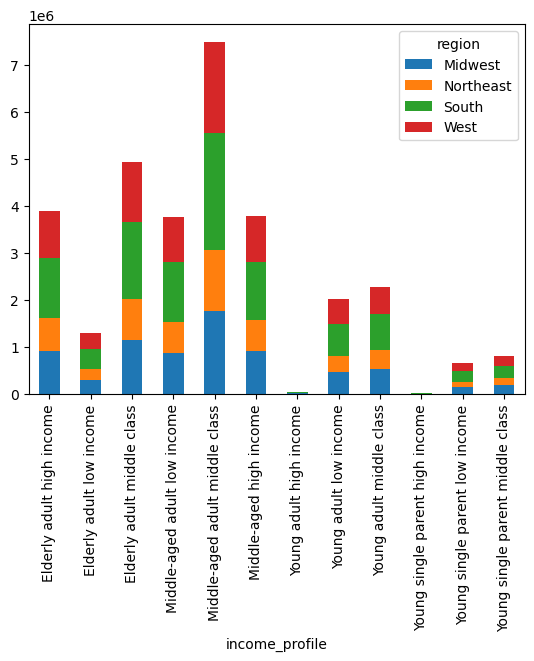

In [58]:
#Creating a stacked bar
cross_bar_stacked = crosstab_profile_region.plot(kind='bar', stacked=True)

In [59]:
#Exporting charts
customer_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_bar_chart.png'))
cross_bar_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_region_stacked_bar.png'))

In [61]:
#Exporting final data set
customers_normal.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_final.pkl'))